<a href="https://colab.research.google.com/github/wardla2/Data-Science-Portfolio/blob/main/Project_5/25_1109_LWard_Project_5_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

## Data Science Problem Definition


This Natural Language Processing project is in three parts:
- part 1) uses a dataset in a CSV file;
- part 2) uses the Wikipedia API to directly access content
on Wikipedia;
- part 3) makes the notebook interactive.

## Part 1)



### Data Collection/Sources


The CSV file is available at https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv

The file contains a list of famous people and a brief overview.

1. Pick one person from the list ( the reference person ) and output 10 other people who's overview are "closest" to the reference person in a Natural Language Processing sense.

2. Also, output the sentiment of the overview of the reference person.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import numpy as np
from textblob import TextBlob

In [2]:
!wget -q -O NLP.csv "https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv"

df = pd.read_csv("NLP.csv")
df.head()

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


## Data Cleaning


In [3]:
# Load csv and fillna to make sure that there are no NaN values

df = pd.read_csv('NLP.csv')
NAME_COL = 'name'
TEXT_COL = 'text'
df[TEXT_COL] = df[TEXT_COL].fillna('')
df

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...
...,...,...,...
42781,<http://dbpedia.org/resource/Motoaki_Takenouchi>,Motoaki Takenouchi,motoaki takenouchi born july 8 1967 saitama pr...
42782,<http://dbpedia.org/resource/Alan_Judge_(footb...,"Alan Judge (footballer, born 1960)",alan graham judge born 14 may 1960 is a retire...
42783,<http://dbpedia.org/resource/Eduardo_Lara>,Eduardo Lara,eduardo lara lozano born 4 september 1959 in c...
42784,<http://dbpedia.org/resource/Tatiana_Faberg%C3...,Tatiana Faberg%C3%A9,tatiana faberg is an author and faberg scholar...


## Exploratory Data Analysis & Processing


In [4]:
# Vectorize

tfidf_vec = TfidfVectorizer(stop_words='english')
X = tfidf_vec.fit_transform(df[TEXT_COL])

In [5]:
# Fit nearest neighbors on TF-IDF matrix X

nn = NearestNeighbors().fit(X)

def top_k_neighbors(ref: str, k):
    ref_idx = df.index[df[NAME_COL] == ref].tolist()[0]
    k = max(1, min(int(k), X.shape[0] - 1))

    distances, indices = nn.kneighbors(X[ref_idx], n_neighbors=k + 1)
    nbr_idxs  = indices[0, 1:1+k]     # drop self by position
    nbr_dists = distances[0, 1:1+k]
    sims = 1.0 - nbr_dists

    out = df.loc[nbr_idxs, [NAME_COL]].copy()
    out['similarity'] = sims
    out['rank'] = np.arange(1, len(out) + 1)
    return out, ref_idx

neighbors_10, ref_idx = top_k_neighbors(ref="Digby Morrell", k=10)
neighbors_10

,name,similarity,rank
32466,Steven Browne,-0.075886,1
36591,Peter Freeman (footballer),-0.128897,2
1347,Lindsay Smith (Australian footballer),-0.140262,3
31705,Earl Spalding,-0.147429,4
28169,Relton Roberts,-0.149817,5
22390,Mark Austin (footballer),-0.160000,6
22123,Todd Curley,-0.162480,7
27556,Daniel Harris (footballer),-0.164193,8
6126,Richard Ambrose,-0.165001,9
21352,Darren Pfeiffer,-0.165577,10


In [6]:
from textblob import TextBlob

def blob_sentiment(text: str):
    s = TextBlob(text).sentiment
    return {'polarity': s.polarity, 'subjectivity': s.subjectivity}

# Output the sentiment of the overview of the reference person
ref_name = df.at[ref_idx, NAME_COL]
ref_text = str(df.at[ref_idx, TEXT_COL])
sent = blob_sentiment(ref_text)
print(f"Reference: {ref_name}")
print(f"Sentiment — polarity: {sent['polarity']:.3f}, subjectivity: {sent['subjectivity']:.3f}")


Reference: Digby Morrell
Sentiment — polarity: -0.042, subjectivity: 0.179


## Part 2)


- For the same reference person that you chose in Part 1), use the Wikipedia API to access the whole content of the reference person's Wikipedia page.
- The goal of Part 2) is to ...
  1. Print out the text of the Wikipedia article for the reference person
  1. Determine the sentiment of the text of the Wikipedia page for the reference person
  1. Collect the text of the Wikipedia pages from the 10 nearest neighbors from Part 1)
  1. Determine the nearness ranking of these 10 people to your reference person based on their entire Wikipedia page
  1. Compare, i.e. plot,  the nearest ranking from Step 1) with the Wikipedia page nearness ranking.  A difference of the rank is one means of comparison.



### Data Collection/Sources


In [7]:
!pip -q install wikipedia-api textblob
import wikipediaapi


In [8]:
# Pull out the Digby Morrell page from wikipedia -- https://en.wikipedia.org/wiki/Digby_Morrell
topic = 'Digby Morrell'
wikip = wikipediaapi.Wikipedia(user_agent = 'fuzzbar')
page_ex = wikip.page(topic)
wiki_text = page_ex.text
wiki_text

"Digby Morrell (born 10 October 1979) is a former Australian rules footballer who played with the Kangaroos and Carlton in the Australian Football League (AFL).\nFrom Western Australia, Morrell played his early senior football for West Perth. His 44-game senior career for the Falcons spanned 1998–2000, and he was the club's leading goalkicker in 2000. At the age of 21, Morrell was recruited to the Australian Football League by the North Melbourne Football Club with its third round selection in the 2001 AFL Rookie Draft. As a forward he twice kicked five goals during his time with the Kangaroos. The first was in a losing cause against Sydney in 2002 and the other the following season in a drawn game against Brisbane.\nAfter the 2003 season, Morrell was traded, along with David Teague, to the Carlton Football Club in exchange for Corey McKernan. He played 32 games for the Blues before being delisted at the end of 2005. He continued to play Victorian Football League (VFL) football with th

### Data Cleaning


In [9]:
def basic_clean(text: str) -> str:
    # mirrors 2b replacements
    t = (text.lower()
         .replace("\n", " ")
         .replace("'s", "")   # possessives
         .replace("'", " "))
    return " ".join(t.split()) # collapse multi-spaces

wiki_text_clean = basic_clean(wiki_text)
wiki_text_clean

'digby morrell (born 10 october 1979) is a former australian rules footballer who played with the kangaroos and carlton in the australian football league (afl). from western australia, morrell played his early senior football for west perth. his 44-game senior career for the falcons spanned 1998–2000, and he was the club leading goalkicker in 2000. at the age of 21, morrell was recruited to the australian football league by the north melbourne football club with its third round selection in the 2001 afl rookie draft. as a forward he twice kicked five goals during his time with the kangaroos. the first was in a losing cause against sydney in 2002 and the other the following season in a drawn game against brisbane. after the 2003 season, morrell was traded, along with david teague, to the carlton football club in exchange for corey mckernan. he played 32 games for the blues before being delisted at the end of 2005. he continued to play victorian football league (vfl) football with the no

### Exploratory Data Analysis & Processing


In [10]:
res = blob_sentiment(wiki_text_clean)

print(f"Reference: {ref_name}")
print(f"Sentiment — polarity={res['polarity']:.3f}, subjectivity={res['subjectivity']:.3f}")

Reference: Digby Morrell
Sentiment — polarity=-0.041, subjectivity=0.193


In [11]:
# Get other Wikipedia pages
def get_wiki_text(title: str) -> str:
    page = wikip.page(title)
    return page.text if page.exists() else ''

# Make a focused corpus: reference + its 10 neighbors from Part 1
names_focus = [df.loc[ref_idx, NAME_COL]] + neighbors_10[NAME_COL].tolist()

# Fetch + clean
wiki_texts = [basic_clean(get_wiki_text(n)) for n in names_focus]

# Vectorize only these pages
tfidf_focus = TfidfVectorizer(stop_words='english').fit_transform(wiki_texts)

# Recompute neighbors in this subset (reference is 0)
nn_focus = NearestNeighbors().fit(tfidf_focus)
dist2, ind2 = nn_focus.kneighbors(tfidf_focus[0], n_neighbors=len(names_focus))

# Convert to new ranking (drop self at position 0)
new_order_idx = ind2[0][1:]
new_sims = 1 - dist2[0][1:]
re_ranked = (pd.DataFrame({
    NAME_COL: [names_focus[i] for i in new_order_idx],
    'similarity_wiki': new_sims,
    'new_rank': np.arange(1, len(new_order_idx)+1)
}))
re_ranked.head(10)

,name,similarity_wiki,new_rank
0,Todd Curley,-0.203091,1
1,Earl Spalding,-0.239499,2
2,Steven Browne,-0.239756,3
3,Daniel Harris (footballer),-0.250505,4
4,Darren Pfeiffer,-0.251882,5
5,Relton Roberts,-0.266121,6
6,Peter Freeman (footballer),-0.266227,7
7,Richard Ambrose,-0.271960,8
8,Lindsay Smith (Australian footballer),-0.277673,9
9,Mark Austin (footballer),-0.281583,10


In [12]:
from scipy.stats import spearmanr

# Map old ranks to names
old_ranks = neighbors_10.set_index(NAME_COL)['rank']
new_ranks = re_ranked.set_index(NAME_COL)['new_rank']
comparison = (pd.concat([old_ranks, new_ranks], axis=1)
                .rename(columns={'rank':'rank_csv', 'new_rank':'rank_wiki'}))
comparison['delta_rank'] = comparison['rank_csv'] - comparison['rank_wiki']
comparison = comparison.reset_index()
comparison

# Rank correlation
rho, p = spearmanr(comparison['rank_csv'], comparison['rank_wiki'])
rho, p

# Sentiment for the reference page
ref_sent = blob_sentiment(wiki_texts[0])
ref_sent

{'polarity': -0.041035353535353536, 'subjectivity': 0.19291125541125542}

### Visualization

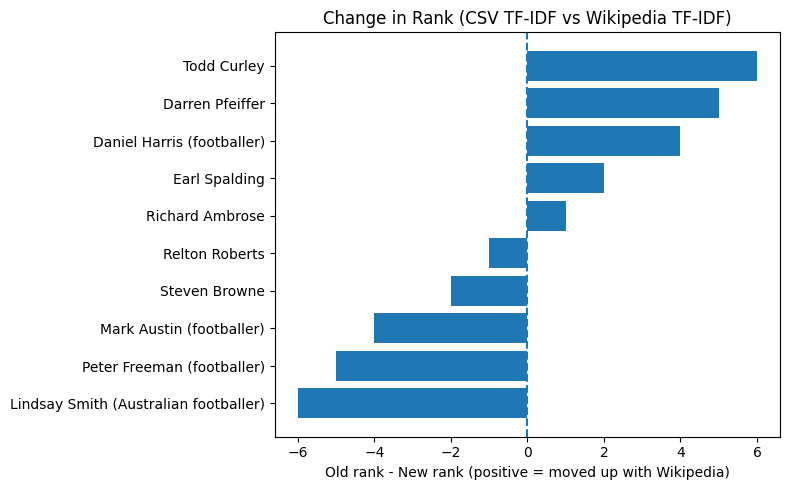

In [13]:
import matplotlib.pyplot as plt

comp_sorted = comparison.sort_values('delta_rank')
plt.figure(figsize=(8,5))
plt.barh(comp_sorted[NAME_COL], comp_sorted['delta_rank'])
plt.axvline(0, linestyle='--')
plt.title('Change in Rank (CSV TF-IDF vs Wikipedia TF-IDF)')
plt.xlabel('Old rank - New rank (positive = moved up with Wikipedia)')
plt.tight_layout()
plt.show()

## Part 3)

Make an interactive notebook where a user can choose or enter a name and the notebook displays the 10 closest individuals.

In addition to presenting the project slides, at the end of the presentation each student will demonstrate their code using a famous person suggested by the other students that exists in the DBpedia set.


In [14]:
import ipywidgets as widgets
from IPython.display import display, clear_output

name_options = sorted(df[NAME_COL].unique())
picker = widgets.Dropdown(options=name_options, description='Person:', layout=widgets.Layout(width='50%'))
btn = widgets.Button(description='Compute', button_style='primary')
out = widgets.Output()

def on_click(_):
    with out:
        clear_output()
        # dbpedia comparison
        n10, ref_idx = top_k_neighbors(picker.value, k=10)
        display(n10)

btn.on_click(on_click)
display(widgets.HBox([picker, btn]), out)

Output()

## Example code

In [18]:
# Enter a name from dbpedia and print the neighbor ranks
ref = input("Enter an exact name from df[NAME_COL]: ")
neighbors_k, ref_idx = top_k_neighbors(ref, k=10)
print(f"Reference index: {ref_idx}")
neighbors_k

Enter an exact name from df[NAME_COL]: Amy Adams
Reference index: 28070


,name,similarity,rank
22804,Julie Walters,-0.114548,1
7118,Janet McTeer,-0.123816,2
34750,Maggie Smith,-0.126847,3
25016,Samantha Morton,-0.132577,4
29556,Felicity Huffman,-0.143755,5
595,Nicole Kidman,-0.144072,6
11156,Anne Hathaway,-0.153150,7
42618,Sigourney Weaver,-0.157718,8
29003,Barbara Hershey,-0.158815,9
37595,Charlize Theron,-0.159244,10
